In [353]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline
sns.set(color_codes=True)

чтение данных

In [328]:
source=pd.read_excel('Данные для тестового задания.xlsx', skiprows=1)

для удобства, избавляемся от русскоязычных терминов

In [329]:
source=source.rename(index=str, columns={"Дата и время": "date", "Обороты 1": "turn1","Обороты 2": "turn2", "Обороты 3": "turn3", "Подшипник 1": "pod1","Подшипник 2": "pod2","Подшипник 3": "pod3","Подшипник 1.1": "rotor1","Подшипник 2.1": "rotor2","Подшипник 3.1": "rotor3","Давление масла 1 (кПа)": "oil1","Давление масла 2 (кПа)": "oil2","Температура масла (С)": "Tempoil", "На входе компрессора": "TGasIn", "На выходе компрессора": "TGasOut", "На входе компрессора (кПа)": "PGasIn", "На выходе компрессора (МПа)": "PGasOut" })

формат данных всех стобцов одинаковый (числа с плавающей точкой), целостность данных не нарушена

In [330]:
print(source.isnull().values.any())
source.info()

False
<class 'pandas.core.frame.DataFrame'>
Index: 11004 entries, 0 to 11003
Data columns (total 17 columns):
date       11004 non-null datetime64[ns]
turn1      11004 non-null float64
turn2      11004 non-null float64
turn3      11004 non-null float64
pod1       11004 non-null float64
pod2       11004 non-null float64
pod3       11004 non-null float64
rotor1     11004 non-null float64
rotor2     11004 non-null float64
rotor3     11004 non-null float64
oil1       11004 non-null float64
oil2       11004 non-null float64
Tempoil    11004 non-null float64
TGasIn     11004 non-null float64
TGasOut    11004 non-null float64
PGasIn     11004 non-null float64
PGasOut    11004 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 1.5+ MB


описательные статистики.
как видно из описательных статистик, некоторые признаки имеют околонулевую дисперсию и обладают очень малой вариативностью ( фактически их значения не изменяются),
некоторые алгоритмы достаточно чувствительны к таким признакам, поэтому при построении возможно их стоит удалить.

In [331]:
source.describe()

,turn1,turn2,turn3,pod1,pod2,pod3,rotor1,rotor2,rotor3,oil1,oil2,Tempoil,TGasIn,TGasOut,PGasIn,PGasOut
count,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000,11004.000000
mean,5552.085572,5551.951317,5549.390565,65.103002,29.033050,46.199555,-0.020231,-0.030812,-0.009298,0.339945,0.336093,39.006851,31.429286,113.961263,36.082421,3.587159
std,178.874828,178.841944,178.830382,6.275282,0.617651,0.655033,0.018524,0.002764,0.006698,0.003830,0.003965,1.162524,3.330348,2.504123,1.913718,0.025218
min,5000.158690,5000.626625,4998.185228,47.533153,27.287129,44.711577,-0.082733,-0.038288,-0.026793,0.328017,0.323763,35.127106,23.127557,104.946009,28.698806,3.304963
25%,5457.742330,5457.586679,5455.275482,61.234763,28.612512,45.693822,-0.032853,-0.032643,-0.013994,0.337653,0.333770,38.368492,28.949597,112.510037,36.086006,3.574550
50%,5595.420369,5595.210789,5592.671716,65.490397,29.057773,46.186144,-0.021274,-0.030934,-0.008969,0.338726,0.334831,39.017436,30.804748,113.906550,36.353161,3.592389
75%,5693.970754,5693.800836,5691.240462,70.270891,29.443051,46.599198,-0.006993,-0.028844,-0.004460,0.342791,0.339109,39.445140,33.291904,115.402531,37.380505,3.604873
max,5852.693693,5852.791303,5849.808789,77.482260,30.973721,49.719864,0.023616,-0.022938,0.009361,0.350016,0.346398,44.802094,43.224804,121.840037,39.232653,3.672669


матрица корреляций.
некоторые признаки ( все обороты двигателя между собой, давление масла 1 и 2 между собой, и другие), 
сильно коррелированы между собой. Стоит отметить что вибрация первого подшипника скоррелирована с оборотами двигателя,
а вибрации второго и третьего имеют крайне низкую корреляцию с оборотами двигателя

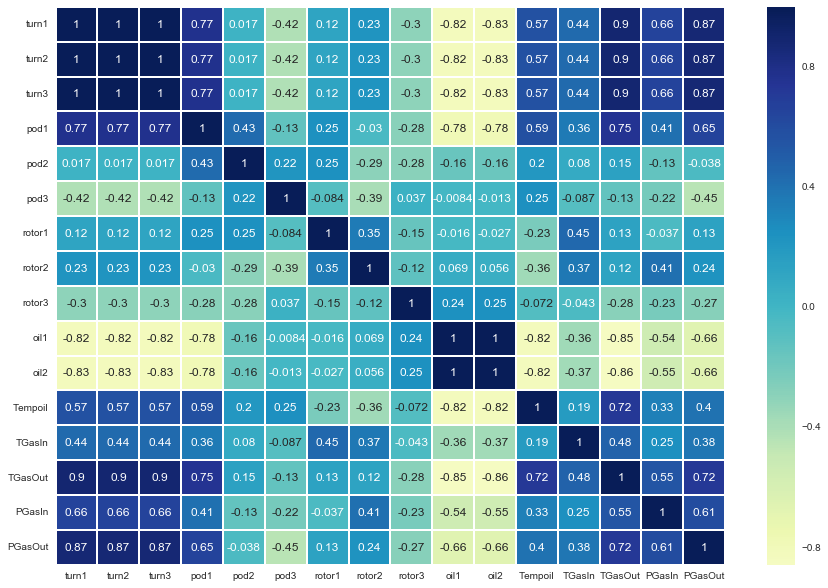

In [332]:
sns.set(rc={'figure.figsize':(15.0,10)})
sns.heatmap(source.corr(),
            annot=True,
            linewidths=1.0,
            center=0,
            cbar=True,
            cmap="YlGnBu")

для дополнительной визуализации отобразим обороты двигателя, видно что признаки практически не отличаются.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


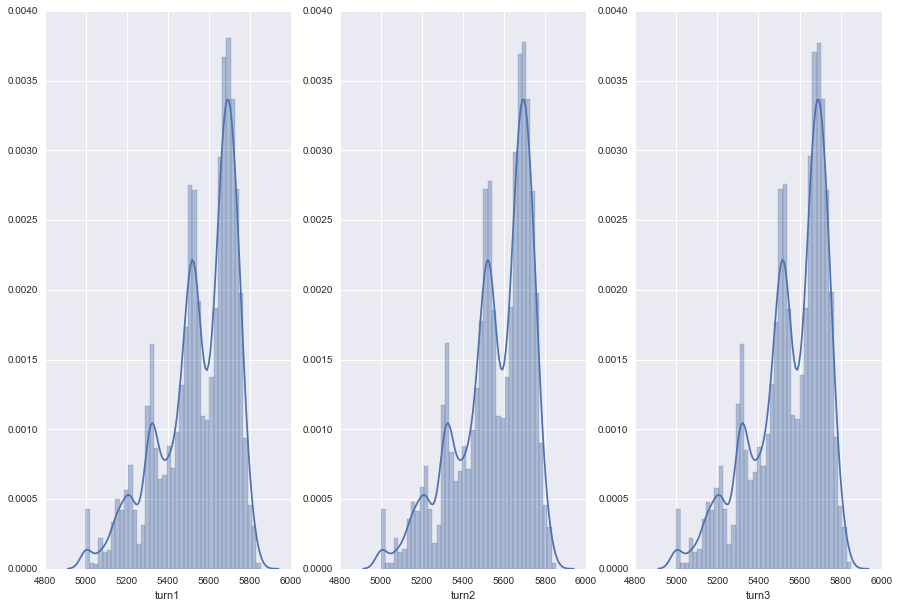

In [333]:
fig, ax =plt.subplots(1,3)
sns.distplot(source['turn1'], ax=ax[0])
sns.distplot(source['turn2'], ax=ax[1])
sns.distplot(source['turn3'], ax=ax[2])
fig.show()

вибрации подшипников достаточно сильно отличаются друг от друга. 

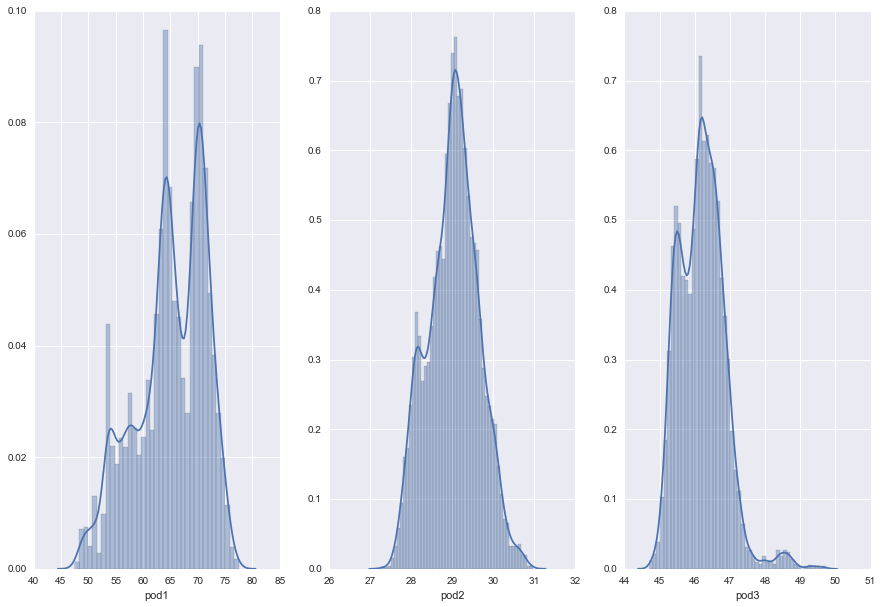

In [334]:
fig, ax =plt.subplots(1,3)
sns.distplot(source['pod1'], ax=ax[0])
sns.distplot(source['pod2'], ax=ax[1])
sns.distplot(source['pod3'], ax=ax[2])


отобразим так же вибрации подшипников в виде "ящиков с усами", для наглядного отображения выбросов в данных.
как и на графике распределения видно, что вибрация 3 подшипника имеет небольшой "хвост", смещённый вправо.

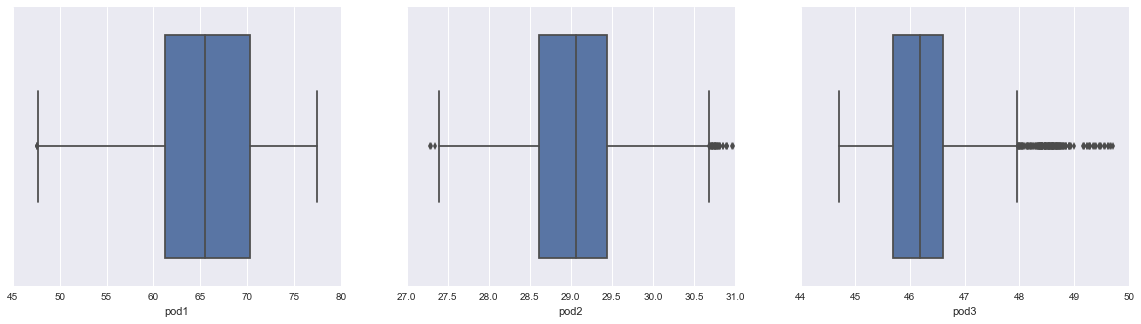

In [336]:
sns.set(rc={'figure.figsize':(20.0,5)})
fig, ax =plt.subplots(1,3)
sns.boxplot(source['pod1'], ax=ax[0])
sns.boxplot(source['pod2'], ax=ax[1])
sns.boxplot(source['pod3'], ax=ax[2])


удалим дату, а так же 1 и 2 оборота двигателя, масло1
признаки имеют 100% корреляцию с оборотом 1, и с маслом 2 сооствественно

In [339]:
source=source.drop('date', axis=1)
source=source.drop('turn1', axis=1)
source=source.drop('turn2', axis=1)
source=source.drop('oil1', axis=1)

для борьбы с выбросами воспользуемся методом изолирующий лес, на основе случайного леса. Другой вариант удалить экземпляры которые не входят в 3 сигмы.


In [340]:

#source=source[np.abs(source.pod3-source.pod3.mean()) <= (3*source.pod3.std())]
#source1=source[np.abs(source.pod3-source.pod3.mean()) <= (3*source.pod3.std())]

data = source
x = data.drop(data.columns[1:4], axis=1)
y = data.iloc[:, 1:4]
model = IsolationForest(n_jobs=4)
model.fit(x, y)
anom = model.predict(x)
source = data[anom == 1]




In [341]:
source.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9903 entries, 67 to 11003
Data columns (total 13 columns):
turn3      9903 non-null float64
pod1       9903 non-null float64
pod2       9903 non-null float64
pod3       9903 non-null float64
rotor1     9903 non-null float64
rotor2     9903 non-null float64
rotor3     9903 non-null float64
oil2       9903 non-null float64
Tempoil    9903 non-null float64
TGasIn     9903 non-null float64
TGasOut    9903 non-null float64
PGasIn     9903 non-null float64
PGasOut    9903 non-null float64
dtypes: float64(13)
memory usage: 1.1+ MB


в итоге удалены оказались около 1100 экземпляров

Следующим этапом построю график информативности признаков, за основу возьму встроенный метод случайнй лес, данная процедура очень рандомная, по сути самый информативный признак является тем, по которому дерево принимает решение к расщеплению. И при других параметрах, может быть совершенно другой результат. Несмотря на это, виден очень сильный дизбаланс, обороты 3 очень сильно выделяются на фоне остальных признаков.

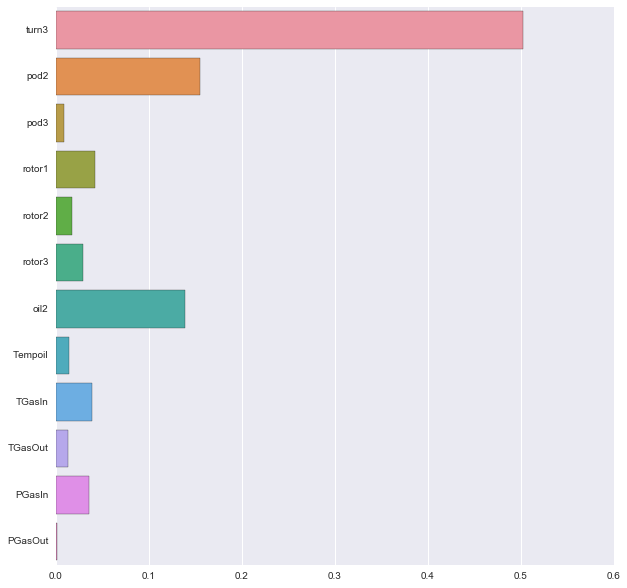

In [342]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(source.drop('pod1',axis=1), source['pod1'], test_size=0.0)
forest = RandomForestRegressor(n_estimators=200, random_state=0)

forest.fit(X_train, y_train)
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=forest.feature_importances_, y=list(X_train))


информативные по градиентному бустингу, показывает совершенно другие результаты, поэтому на основе результатов этих алгоритмов,
не стоит строить предположение о важности признаков

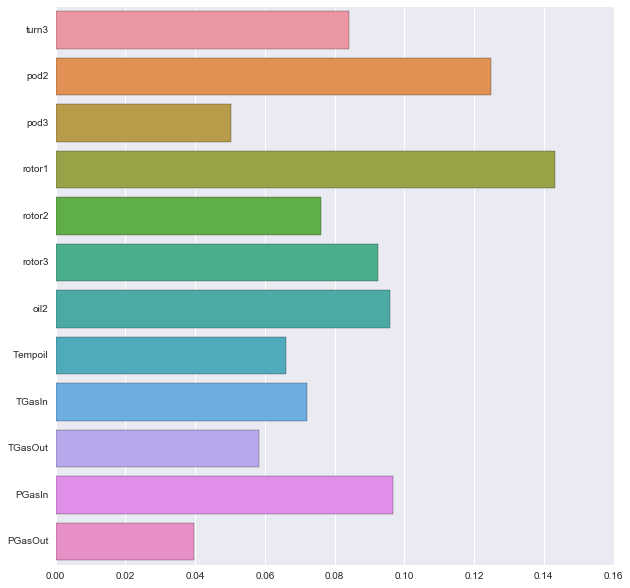

In [343]:

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(source.drop('pod1',axis=1), source['pod1'], test_size=0.0)
GBM = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1)

GBM.fit(X_train, y_train)
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=GBM.feature_importances_, y=list(X_train))

функции для выбранных регрессоров

In [344]:
def RF_results(X_train, y_train,X_valid,y_valid, X_test, y_test):
    model = RandomForestRegressor(n_estimators=500, max_features=0.8, max_depth=3)
    model.fit(X_train, y_train)
    #проверка на валидационном сете
    val_pred = model.predict(X_valid)
    r2_val= r2_score(y_valid, val_pred)
    #проверка на тестовом сете
    test_pred = model.predict(X_test)
    r2_test= r2_score(y_test, test_pred)
    return r2_val, r2_test
    #return (print("RF score on validation set: {:.2f}".format(r2_val),"Test set score : {:.2f}".format(r2_test) ))

In [345]:
def GBM_results(X_train, y_train,X_valid,y_valid, X_test, y_test):
    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, max_features=0.8)
    model.fit(X_train, y_train)
    #проверка на валидационном сете
    val_pred = model.predict(X_valid)
    r2_val= r2_score(y_valid, val_pred)
    #проверка на тестовом сете
    test_pred = model.predict(X_test)
    r2_test= r2_score(y_test, test_pred)
    return r2_val, r2_test
    #return (print("GBM score on validation set: {:.2f}".format(r2_val),"Test set score : {:.2f}".format(r2_test) ))

In [346]:
def SVM_results(X_train, y_train,X_valid,y_valid, X_test, y_test):
    model = svm.SVR()
    model.fit(X_train, y_train)
    #проверка на валидационном сете
    val_pred = model.predict(X_valid)
    r2_val= r2_score(y_valid, val_pred)
    #проверка на тестовом сете
    test_pred = model.predict(X_test)
    r2_test= r2_score(y_test, test_pred)
    return r2_val, r2_test
    #return (print("SVM score on validation set: {:.2f}".format(r2_val),"Test set score : {:.2f}".format(r2_test) ))

Целевая метка вибрация первого подшипника.
Метрикой качества служит R^2.
Необходимо удалить также значения второго и третьего подшипника

In [347]:
source1=source.drop('pod2', axis=1)
source1=source.drop('pod3', axis=1)

valGBM=[]
testGBM=[]
valRF=[]
testRF=[]
valSVM=[]
testSVM=[]

#перемешаем данные
source1.sample(frac=1)
# отделим отдельно выборку для теста
X_trainval, X_test, y_trainval, y_test = train_test_split(
    source1.drop('pod1',axis=1), source1.pod1)


for number in range(10):
#перемешаем данные снова, что бы перестраховаться от случая, что в результате рандома получатся "идеальные выборки"
    X_trainval.sample(frac=1)
    #создадим тренировчную и валидационную выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)
    valG,testG=GBM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valGBM.append(valG)
    testGBM.append(testG)
    valR,testR=RF_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valRF.append(valR)
    testRF.append(testR)
    valS,testS=SVM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valSVM.append(valS)
    testSVM.append(testS)
    #print ("GBM score on validation set: {:.2f}".format(valG),"Test set score : {:.2f}".format(testG) )
    #print ("RF score on validation set: {:.2f}".format(valR),"Test set score : {:.2f}".format(testR) )
    #print ("SVM score on validation set: {:.2f}".format(valS),"Test set score : {:.2f}".format(testS) )
R2_GBM_val=sum(valGBM)/len(valGBM)
R2_GBM_test=sum(testGBM)/len(testGBM)

R2_RF_val=sum(valRF)/len(valRF)
R2_RF_test=sum(testRF)/len(testRF)

R2_SVM_val=sum(valSVM)/len(valSVM)
R2_SVM_test=sum(testSVM)/len(testSVM)

print ("mean GBM score on validation set: {:.2f}".format(R2_GBM_val))
print ("mean GBM score on test set: {:.2f}".format(R2_GBM_test))
print ("mean RF score on validation set: {:.2f}".format(R2_RF_val))
print ("mean RF score on test set: {:.2f}".format(R2_RF_test))
print ("mean SVM score on validation set: {:.2f}".format(R2_SVM_val))
print ("mean SVM score on test set: {:.2f}".format(R2_SVM_test))

mean GBM score on validation set: 0.96
mean GBM score on test set: 0.96
mean RF score on validation set: 0.83
mean RF score on test set: 0.83
mean SVM score on validation set: 0.77
mean SVM score on test set: 0.75


Целевая метка вибрация второго подшипника
необходимо удалить значения первого и третьего подшипника

In [360]:
source2=source.drop('pod1', axis=1)
source2=source.drop('pod3', axis=1)

valGBM=[]
testGBM=[]
valRF=[]
testRF=[]
valSVM=[]
testSVM=[]

#перемешаем данные
source1.sample(frac=1)
# отделим отдельно выборку для теста
X_trainval, X_test, y_trainval, y_test = train_test_split(
    source2.drop('pod2',axis=1), source2.pod2)


for number in range(10):
#перемешаем данные снова, что бы перестраховаться от случая, что в результате рандома получатся "идеальные выборки"
    X_trainval.sample(frac=1)
    #создадим тренировчную и валидационную выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)
    valG,testG=GBM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valGBM.append(valG)
    testGBM.append(testG)
    valR,testR=RF_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valRF.append(valR)
    testRF.append(testR)
    valS,testS=SVM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valSVM.append(valS)
    testSVM.append(testS)
    #print ("GBM score on validation set: {:.2f}".format(valG),"Test set score : {:.2f}".format(testG) )
    #print ("RF score on validation set: {:.2f}".format(valR),"Test set score : {:.2f}".format(testR) )
    #print ("SVM score on validation set: {:.2f}".format(valS),"Test set score : {:.2f}".format(testS) )
R2_GBM_val=sum(valGBM)/len(valGBM)
R2_GBM_test=sum(testGBM)/len(testGBM)

R2_RF_val=sum(valRF)/len(valRF)
R2_RF_test=sum(testRF)/len(testRF)

R2_SVM_val=sum(valSVM)/len(valSVM)
R2_SVM_test=sum(testSVM)/len(testSVM)

print ("mean GBM score on validation set: {:.2f}".format(R2_GBM_val))
print ("mean GBM score on test set: {:.2f}".format(R2_GBM_test))
print ("mean RF score on validation set: {:.2f}".format(R2_RF_val))
print ("mean RF score on test set: {:.2f}".format(R2_RF_test))
print ("mean SVM score on validation set: {:.2f}".format(R2_SVM_val))
print ("mean SVM score on test set: {:.2f}".format(R2_SVM_test))

mean GBM score on validation set: 0.85
mean GBM score on test set: 0.86
mean RF score on validation set: 0.65
mean RF score on test set: 0.66
mean SVM score on validation set: 0.80
mean SVM score on test set: 0.79


Целевая метка вибрация третьего подшипника
удалим данные первого и второго подшипника

In [361]:
source3=source.drop('pod1', axis=1)
source3=source.drop('pod2', axis=1)

valGBM=[]
testGBM=[]
valRF=[]
testRF=[]
valSVM=[]
testSVM=[]

#перемешаем данные
source1.sample(frac=1)
# отделим отдельно выборку для теста
X_trainval, X_test, y_trainval, y_test = train_test_split(
    source3.drop('pod3',axis=1), source3.pod3)


for number in range(10):
#перемешаем данные снова, что бы перестраховаться от случая, что в результате рандома получатся "идеальные выборки"
    X_trainval.sample(frac=1)
    #создадим тренировчную и валидационную выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval)
    valG,testG=GBM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valGBM.append(valG)
    testGBM.append(testG)
    valR,testR=RF_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valRF.append(valR)
    testRF.append(testR)
    valS,testS=SVM_results(X_train, y_train,X_valid,y_valid, X_test, y_test)
    valSVM.append(valS)
    testSVM.append(testS)
    #print ("GBM score on validation set: {:.2f}".format(valG),"Test set score : {:.2f}".format(testG) )
    #print ("RF score on validation set: {:.2f}".format(valR),"Test set score : {:.2f}".format(testR) )
    #print ("SVM score on validation set: {:.2f}".format(valS),"Test set score : {:.2f}".format(testS) )
R2_GBM_val=sum(valGBM)/len(valGBM)
R2_GBM_test=sum(testGBM)/len(testGBM)

R2_RF_val=sum(valRF)/len(valRF)
R2_RF_test=sum(testRF)/len(testRF)

R2_SVM_val=sum(valSVM)/len(valSVM)
R2_SVM_test=sum(testSVM)/len(testSVM)

print ("mean GBM score on validation set: {:.2f}".format(R2_GBM_val))
print ("mean GBM score on test set: {:.2f}".format(R2_GBM_test))
print ("mean RF score on validation set: {:.2f}".format(R2_RF_val))
print ("mean RF score on test set: {:.2f}".format(R2_RF_test))
print ("mean SVM score on validation set: {:.2f}".format(R2_SVM_val))
print ("mean SVM score on test set: {:.2f}".format(R2_SVM_test))

mean GBM score on validation set: 0.89
mean GBM score on test set: 0.89
mean RF score on validation set: 0.60
mean RF score on test set: 0.61
mean SVM score on validation set: 0.77
mean SVM score on test set: 0.77


В первом задание необходимо было построить математические модели 3-х подшипников.

По условию не понял, как нужно было разбивать данные. Можно ли было для предсказания вибрации первого подшипника использовать значения второго и третьего? Тоже самое и для предсказания других подшипников. В итоге решил их не использовать, и строил модели с условием что я ничего не знаю о других подшипниках. 

Кратко опишу что было сделано:

•	Считаны данные, проверена целостность, переименованы признаки

•	Посмотрел на данные глазами, отметил интересные факты (около нулевая дисперсия, корреляции)

•	Удалил некоторые признаки

•	Сделал очистку от аномалий, воспользовался изолирующим лесом

•	Посчитал информативность признаков, на основе градиентного бустинга и случайного леса

•	Построил 3 регрессора, не подбирал параметры

•	Разбил выборку на 3 части, обучающая, тестовая, и валидационная

•	Обучил регрессоры на оставшихся признаках, оценил качество моделей по R2

•	Краткий вывод, лучшим оказался градиентный бустинг

Что не было сделано:

•	Не делал шкалирование данных, и всяческие преобразования, которые потенциально могли улучшить модель (некоторые методы чувствительны к шкале, например, SVM и нейронные сети).

•	Не делал подбор гиперпараметров моделей, из-за ограниченности во времени и ресурсах пк

•	Не делал подбор оптимального признакового пространства, которое могло потенциально сократить время вычислений

•	Сделал удаление аномалий одним методом, возможно стоило попробовать несколько и сравнить результат

•	От переобучения спасался выставив некоторые параметры в регрессорах, возможно стоило попробовать регуляризацию

